In [2]:
%load_ext autoreload
%autoreload 2

# Manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 15)



In [3]:
df = pd.read_csv('../data/processed/cleaned_data.csv')
df2 = pd.read_csv('../data/processed/collisions_and_intersections_cleaned.csv')
df.head()

/home/maureen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Datetime,X,Y,OBJECTID,INCKEY,ADDRTYPE,INTKEY,LOCATION,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,ST_COLCODE,CROSSWALKKEY,SPEEDING_Y,INATTENTIONIND_Y,HITPARKEDCAR_Y,PEDROWNOTGRNT_Y,WEATHER_Adverse,WEATHER_Good,WEATHER_Unknown,ROADCOND_Adverse,ROADCOND_Dry,ROADCOND_Unknown,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Unknown,LIGHTCOND_VeryDark,SEVERITYCODE_Injury,SEVERITYCODE_PropertyDamage,SEVERITYCODE_Unknown
0,2004-01-01 00:00:00,NaN,NaN,11627,25040,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,0,13,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,2004-01-01 00:00:00,-122.318760,47.604359,12525,24635,Block,NaN,E ALDER ST BETWEEN 10TH AVE AND 11TH AVE,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),16.0,0,32,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2004-01-01 00:00:00,-122.320780,47.614076,14172,26463,Intersection,29745.0,BROADWAY AND E PIKE ST,4,0,0,2,1,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,0,28,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,2004-01-01 00:00:00,-122.383351,47.529183,6538,19530,Block,NaN,SW ROSE ST BETWEEN 39TH AVE SW AND 41ST AVE SW,2,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,0,32,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,2004-01-01 00:00:00,-122.329974,47.708637,9665,22520,Block,NaN,N NORTHGATE WAY BETWEEN CORLISS AVE N AND 1ST ...,1,0,0,1,0,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),28.0,0,50,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [4]:
# Drop columns and check NaN
to_drop = ['Datetime', 'X', 'Y', 'OBJECTID', 'INCKEY', 'ADDRTYPE', 'LOCATION', 
           'INCDATE', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'ST_COLCODE', 'INTKEY',
           'PERSONCOUNT']
data = df.drop(columns=to_drop)
data.isnull().sum()

PEDCOUNT                       0
PEDCYLCOUNT                    0
VEHCOUNT                       0
INJURIES                       0
SERIOUSINJURIES                0
                              ..
LIGHTCOND_Unknown              0
LIGHTCOND_VeryDark             0
SEVERITYCODE_Injury            0
SEVERITYCODE_PropertyDamage    0
SEVERITYCODE_Unknown           0
Length: 25, dtype: int64

In [72]:
# Split into injury vs non-injury
df_injury = (
    data[data['SEVERITYCODE_Injury'] == 1]
    .drop(columns=['PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'SEVERITYCODE_Injury','SEVERITYCODE_PropertyDamage', 'SEVERITYCODE_Unknown'])
)

df_noinjury = (
    data[data['SEVERITYCODE_Injury'] == 0]
    .drop(columns=['PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'SEVERITYCODE_Injury','SEVERITYCODE_PropertyDamage', 'SEVERITYCODE_Unknown'])
)

injury_ct = df_injury.sum()
noinjury_ct = df_noinjury.sum()

df_injury.shape[0], df_noinjury.shape[0]

UNDERINFL             60906
CROSSWALKKEY          60906
SPEEDING_Y            60906
INATTENTIONIND_Y      60906
HITPARKEDCAR_Y        60906
                      ...  
ROADCOND_Unknown      60906
LIGHTCOND_Dark        60906
LIGHTCOND_Daylight    60906
LIGHTCOND_Unknown     60906
LIGHTCOND_VeryDark    60906
Length: 16, dtype: int64

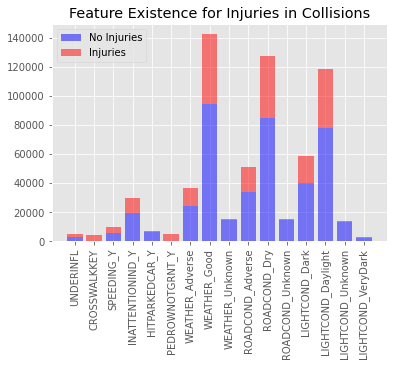

In [96]:
fig, ax = plt.subplots()

ax.bar(noinjury_ct.index, noinjury_ct, label='No Injuries', alpha=0.5, color='blue')
ax.bar(injury_ct.index, injury_ct, label='Injuries', alpha=0.5, bottom=noinjury_ct, color='red')
ax.legend(loc='upper left')
ax.set_title('Feature Existence for Injuries in Collisions')
ax.set_xticklabels(injury_ct.index, rotation=90)
plt.savefig('../reports/figures/feature_existence_collisions.png', bbox_inches='tight', dpi=250)

In [93]:
# Split into ped/cyclist or not
df_pedcycle = (
    data[(data['PEDCYLCOUNT'] != 0) | (data['PEDCOUNT'] != 0)]
    .drop(columns=['PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'SEVERITYCODE_PropertyDamage', 'SEVERITYCODE_Unknown'])
)

df_nopedcycle = (
    data[(data['PEDCYLCOUNT'] == 0) & (data['PEDCOUNT'] == 0)]
    .drop(columns=['PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'SEVERITYCODE_PropertyDamage', 'SEVERITYCODE_Unknown'])
)

ped_cycle_ct = df_pedcycle.sum()
nopedcycle_ct = df_nopedcycle.sum()

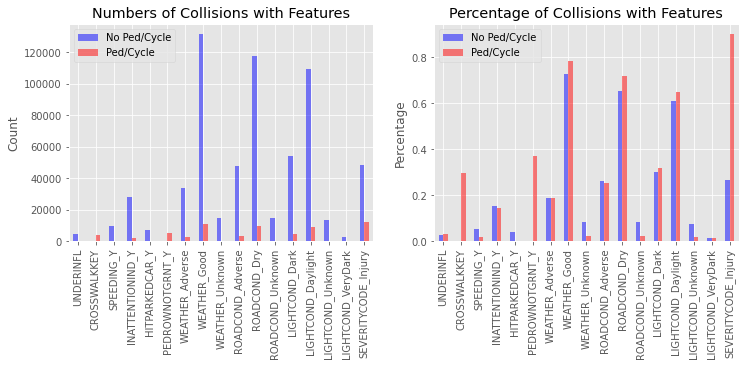

In [123]:
# Plot
perc = pd.DataFrame({'No Ped/Cycle':df_nopedcycle.sum()/df_nopedcycle.shape[0],
                 'Ped/Cycle': df_pedcycle.sum()/df_pedcycle.shape[0]},
             index=df_pedcycle.sum().index)


cts = pd.DataFrame({'No Ped/Cycle': nopedcycle_ct,'Ped/Cycle': ped_cycle_ct}, 
                 index=ped_cycle_ct.index)


fig, axes = plt.subplots(1,2, figsize=(12,4))

ax = axes[0]
cts.plot(kind='bar', alpha=0.5, color=['blue', 'red'], ax=ax)
ax.set_title('Numbers of Collisions with Features')
ax.set_ylabel('Count')
ax.legend(loc='upper left')

ax = axes[1]
perc.plot(kind='bar', alpha=0.5, color=['blue', 'red'], ax=ax)
ax.set_title('Percentage of Collisions with Features')
ax.set_ylabel('Percentage')
ax.legend(loc='upper left')

plt.savefig('../reports/figures/feature_existence_collisions.png', bbox_inches='tight', dpi=250)